In [1]:
%load_ext autotime

time: 452 µs


In [12]:
import numpy as np
import _pickle as pickle
from collections import Counter

time: 642 µs


In [3]:
code_seq_2013 = pickle.load(open("../../DATA/code_seq_2013","rb"))
cost_seq_2013 = pickle.load(open("../../DATA/cost_seq_2013","rb"))
date_seq_2013 = pickle.load(open("../../DATA/date_seq_2013","rb"))
util_seq_2013 = pickle.load(open("../../DATA/util_seq_2013","rb"))

time: 16.8 s


In [4]:
PCA_Embedding_100 = pickle.load(open("../../MODELS/PCA/Embeddings/PCA_Embedding_100","rb"))
DAE_Embedding_100 = pickle.load(open("../../MODELS/DAE/Embeddings/DAE_Embedding_100","rb"))
RNNAE_Embedding_100 = pickle.load(open("../../MODELS/RNNAE/Embeddings/RNNAE_Embedding_100","rb"))
TLSTMAE_Embedding_100 = pickle.load(open("../../MODELS/TLSTMAE/TLSTMAE_Embedding_100","rb"))
ConvAE_Embedding_100 = pickle.load(open("../../MODELS/ConvAE/ConvAE_Embedding_100","rb"))

time: 1.77 s


In [5]:
TMAE_C_Embedding_100 = pickle.load(open("../../MODELS/TMAE-C/TMAE_Embedding_100","rb"))
TMAE_P_Embedding_100 = pickle.load(open("../../MODELS/TMAE-P/TMAE_Embedding_100","rb"))
TMAE_Embedding_100 = pickle.load(open("../../MODELS/TMAE/Embeddings/TMAE_Embedding_100","rb"))

time: 494 ms


In [15]:
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.manifold import TSNE

def generate_plot(Embedding, labels, color_dic, legend, title, legend_flag=False):
    tsne_model = TSNE(n_components=2, init='pca', random_state=23)
    new_values = tsne_model.fit_transform(Embedding)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    for i in range(len(x)):
        plt.scatter(x[i],y[i], color = color_dic[labels[i]], alpha=0.4)
    for i in range(len(color_dic)):
        plt.scatter(0,0, color=color_dic[i], label=legend[i], alpha=0.4)
    if legend_flag: plt.legend()
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    #plt.axis('off')
    plt.savefig(title, dpi=600)
    plt.show()

time: 5.04 ms


In [7]:
from sklearn import metrics

def scores(embeddings, labels, n=4):
    ch_score = metrics.calinski_harabasz_score(embeddings, labels)
    db_score = metrics.davies_bouldin_score(embeddings, labels)
    print("ch_score, db_score:", ch_score, db_score)
    return ch_score, db_score

time: 1.4 ms


# Different Diseases

In [8]:
diag2cat = pickle.load(open("../../DATA/CCS/diag2cat","rb"))

time: 39.2 ms


In [9]:
ccs_seq = []

for p in code_seq_2013:
    p_ccs = []
    for v in p:
        v_ccs = []
        for c in v:
            if c in diag2cat:
                new_c = diag2cat[c]
                v_ccs.append(new_c)
        p_ccs.extend(list(set(v_ccs)))
    ccs_seq.append(p_ccs)

time: 2.58 s


In [10]:
def select_diag(code, code_seq, freq=1):
    idx_seq = []
    for i, p_code in enumerate(code_seq):
        if code in p_code and Counter(p_code)[code]>=freq:
            idx_seq.append(i)
    return idx_seq

time: 1 ms


In [13]:
k=300
d1_idx = select_diag("49", ccs_seq, freq=1)[:k]
d2_idx = select_diag("128", ccs_seq, freq=2)[:k]
d3_idx = select_diag("657", ccs_seq, freq=2)[:k]
d4_idx = select_diag("83", ccs_seq, freq=2)[:k]

len(d1_idx), len(d2_idx), len(d3_idx), len(d4_idx)

(300, 300, 300, 300)

time: 286 ms


In [14]:
idx = d1_idx + d2_idx + d3_idx + d4_idx
label = [0]*len(d1_idx) + [1]*len(d2_idx) + [2]*len(d3_idx) + [3]*len(d4_idx)

color_dic = {0:"y", 1:"g", 2:"b", 3:"r"}
legend = ["Diabetes", "Asthma", "Depress", "Seizure"]

time: 1.56 ms


In [17]:
scores(PCA_Embedding_100[idx], label)
scores(DAE_Embedding_100[idx], label)
scores(RNNAE_Embedding_100[idx], label)
scores(TLSTMAE_Embedding_100[idx], label)
scores(ConvAE_Embedding_100[idx], label)

ch_score, db_score: 31.24946350778796 4.18571802162731
ch_score, db_score: 18.882961056565545 7.174772695309267
ch_score, db_score: 24.993669885149693 5.283013902158585
ch_score, db_score: 18.426004554796634 6.094199952880328
ch_score, db_score: 15.344597190995517 9.076904586789318


(15.344597190995517, 9.076904586789318)

time: 91.8 ms


In [18]:
scores(TMAE_C_Embedding_100[idx], label)
scores(TMAE_P_Embedding_100[idx], label)
scores(TMAE_Embedding_100[idx], label)

ch_score, db_score: 39.65745003661047 4.0760646271530865
ch_score, db_score: 56.427050521526446 3.6071265776208308
ch_score, db_score: 64.17575613706441 3.5168176601132703


(64.17575613706441, 3.5168176601132703)

time: 85.9 ms


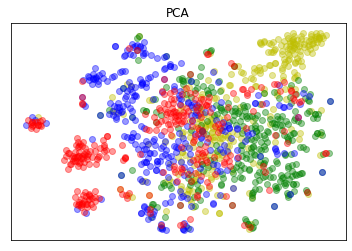

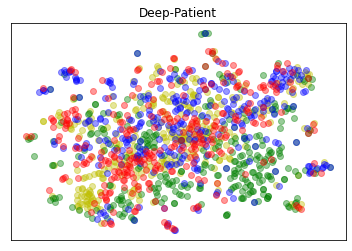

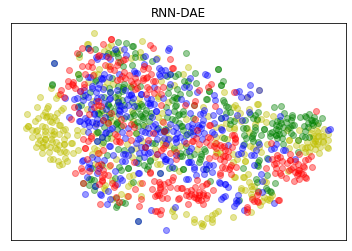

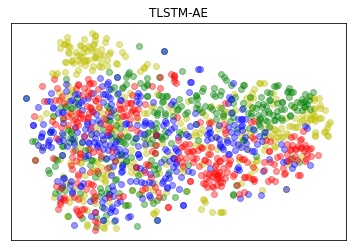

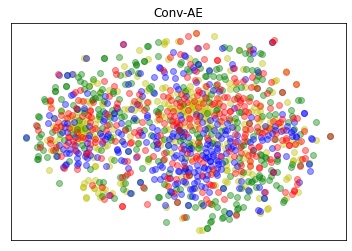

time: 2min 58s


In [29]:
generate_plot(PCA_Embedding_100[idx], label, color_dic, legend, title="PCA")
generate_plot(DAE_Embedding_100[idx], label, color_dic, legend, title="Deep-Patient")
generate_plot(RNNAE_Embedding_100[idx], label, color_dic, legend, title="RNN-DAE")
generate_plot(TLSTMAE_Embedding_100[idx], label, color_dic, legend, title="TLSTM-AE")
generate_plot(ConvAE_Embedding_100[idx], label, color_dic, legend, title="Conv-AE")

In [ ]:
generate_plot(TMAE_C_Embedding_100[idx], label, color_dic, legend, title="TMAE-C")
generate_plot(TMAE_P_Embedding_100[idx], label, color_dic, legend, title="TMAE-P")
generate_plot(TMAE_Embedding_100[idx], label, color_dic, legend, title="TMAE", legend_flag=True)

In [ ]:
# TMAE_Embedding_500 = pickle.load(open("../../MODELS/TMAE/Embeddings/TMAE_Embedding_500","rb"))
# generate_plot(TMAE_Embedding_500[idx], label, color_dic, legend, title="TMAE", legend_flag=True)

# different dimension

In [31]:
def generate_scores(path, idx, label):
    ch_list, db_list = [], []
    for dim in [100,200,300,400,500]:
        embedding = pickle.load(open(path+str(dim),"rb"))
        ch_score, db_score = scores(embedding[idx], label)
        ch_list.append(ch_score)
        db_list.append(db_score)
    return ch_list, db_list

time: 10.2 ms


In [32]:
pca_path = "../../MODELS/PCA/Embeddings/PCA_Embedding_"
pca_ch_list, pca_db_list = generate_scores(pca_path, idx, label)

ch_score, db_score: 31.24946350778796 4.18571802162731
ch_score, db_score: 26.839339493821704 4.571646540927644
ch_score, db_score: 25.75947784897876 4.725364584217
ch_score, db_score: 24.761607522419528 4.842116893597082
ch_score, db_score: 24.211864247842044 4.915978428317195
time: 6.11 s


In [33]:
dae_path = "../../MODELS/DAE/Embeddings/DAE_Embedding_"
dae_ch_list, dae_db_list = generate_scores(dae_path, idx, label)

ch_score, db_score: 18.882961056565545 7.174772695309267
ch_score, db_score: 18.967896611636498 6.537487900018467
ch_score, db_score: 16.219497319200325 8.162032561310198
ch_score, db_score: 18.723684004827756 7.789791955677643
ch_score, db_score: 17.783689498282193 7.128343012906059
time: 1.91 s


In [34]:
rnnae_path = "../../MODELS/RNNAE/Embeddings/RNNAE_Embedding_"
rnnae_ch_list, rnnae_db_list = generate_scores(rnnae_path, idx, label)

ch_score, db_score: 24.993669885149693 5.283013902158585
ch_score, db_score: 22.65903844253411 5.344973350025628
ch_score, db_score: 18.85477880240347 5.874592371420624
ch_score, db_score: 19.016176611085758 5.8780832068491256
ch_score, db_score: 18.95382067339293 5.832159600933538
time: 2.08 s


In [35]:
tmae_path = "../../MODELS/TMAE/Embeddings/TMAE_Embedding_"
tmae_ch_list, tmae_db_list = generate_scores(tmae_path, idx, label)

ch_score, db_score: 64.17575613706441 3.5168176601132703
ch_score, db_score: 55.849785787386985 3.7743849079748624
ch_score, db_score: 48.99119400806533 3.857031627394946
ch_score, db_score: 56.50186189674923 3.7344145671644577
ch_score, db_score: 56.221452890637785 3.66105245257127
time: 1.84 s


In [36]:
tmae_c_path = "../../MODELS/TMAE-C/TMAE_Embedding_"
tmae_c_ch_list, tmae_c_db_list = generate_scores(tmae_c_path, idx, label)

ch_score, db_score: 39.65745003661047 4.0760646271530865
ch_score, db_score: 43.59835545049226 3.899491876533404
ch_score, db_score: 41.58475153654994 4.0754905995772095
ch_score, db_score: 40.952632596627 4.050546649856904
ch_score, db_score: 43.25417250007382 3.9622199468760755
time: 1.79 s


In [37]:
tmae_p_path = "../../MODELS/TMAE-P/TMAE_Embedding_"
tmae_p_ch_list, tmae_p_db_list = generate_scores(tmae_p_path, idx, label)

ch_score, db_score: 56.427050521526446 3.6071265776208308
ch_score, db_score: 45.80647224879186 3.9620595845202193
ch_score, db_score: 50.77745454821363 3.8501544377242527
ch_score, db_score: 46.4062125109095 3.913677310771462
ch_score, db_score: 53.26263988894128 3.743387694371442
time: 1.86 s


In [38]:
# diag
tlstmae_ch_list = [18.42, 19.62, 16.49, 16.81, 17.02]
tlstmae_db_list = [6.09, 6.31, 6.44, 6.42, 6.61]

time: 972 µs


In [39]:
# diag
convae_ch_list = [15.34, 14.11, 14.25, 15.74, 16.22]
convae_db_list = [9.07, 9.05, 9.68, 9.22, 9.14]

time: 932 µs


# Diag

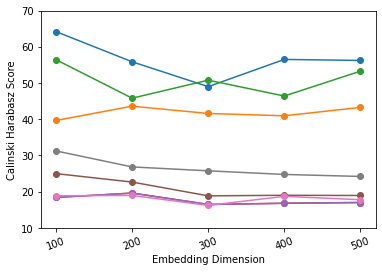

time: 239 ms


In [43]:
plt.plot(tmae_ch_list, 'o-', label="TMAE")
plt.plot(tmae_c_ch_list, 'o-', label="C-TMAE")
plt.plot(tmae_p_ch_list, 'o-', label="P-TMAE")

plt.plot(tlstmae_ch_list, 'o-', label="CONVAE")
plt.plot(tlstmae_ch_list, 'o-', label="TLSTMAE")
plt.plot(rnnae_ch_list, 'o-', label="RNNAE")
plt.plot(dae_ch_list, 'o-', label="DAE")
plt.plot(pca_ch_list, 'o-', label="PCA")

plt.xlabel("Embedding Dimension")
plt.ylabel("Calinski Harabasz Score")
plt.ylim(10,70)
plt.xticks(range(5), ['100', '200', '300', "400", "500"], rotation=20)
# lgd = plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1.03))
plt.savefig("Diagnosis_CH_score")
plt.show()


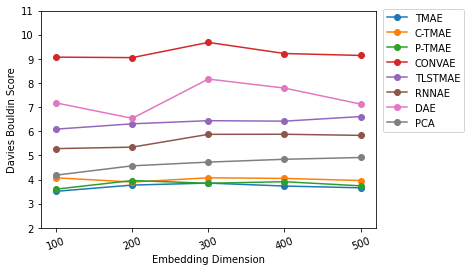

time: 433 ms


In [44]:
plt.plot(tmae_db_list, 'o-', label="TMAE")
plt.plot(tmae_c_db_list, 'o-', label="C-TMAE")
plt.plot(tmae_p_db_list, 'o-', label="P-TMAE")

plt.plot(convae_db_list, 'o-', label="CONVAE")
plt.plot(tlstmae_db_list, 'o-', label="TLSTMAE")
plt.plot(rnnae_db_list, 'o-', label="RNNAE")
plt.plot(dae_db_list, 'o-', label="DAE")
plt.plot(pca_db_list, 'o-', label="PCA")

plt.xlabel("Embedding Dimension")
plt.ylabel("Davies Bouldin Score")
plt.ylim(2, 11)
plt.xticks(range(5), ['100', '200', '300', "400", "500"], rotation=20)
lgd = plt.legend(loc='upper right', bbox_to_anchor=(1.28, 1.03))
plt.savefig("Diagnosis_DB_score", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()